#### DBSCAN advantages:
+ no need to set number of clusters
+ can capture clusters of complex shape
+ can identify points that are not part of any cluster (noise)

#### DBSCAN main parameters:
+ min_samples
+ eps

#### DBSCAN intuition:
DBSCAN identifies points that are in 'crowded' regions of feature space, where many points are close together
(dense regions in feature space).

Clusters form dense regions of data, separated by regions that are relatively empty.

**Core samples** - points that are within a dense region.

**Core samples**: if there are at least min_samples many data points within a distance of eps to a given
data point, that data point is classified as a core sample.

Core samples closer to each other than eps are put into the same cluster.

#### DBSCAN algorithm:
1. Pick an arbitrary point to start with.
2. Find all points with distance eps or less from that point.
3. 3.1. If less than min_samples points within distance eps of the starting point, label this point as noise (so it doesn’t belong to any cluster)

   3.2. If more than min_samples points within distance of eps, label this point as **core sample** and assign a new cluster label.
4. Visit all neighbor points within eps: if they have not been assigned a cluster yet, assign new cluster label that was just created. If they are core samples, their neighbors are visited in turn, and so on.

5. **Stop cluster growing when** there are no more core samples within distance eps of the cluster.

6. Pick another point not visited.

#### DBSCAN results:
1. Core points.
2. Point within eps-distance to core points - **boundary points**
(cluster membership of boundary points depends on the order in which points were visited)
3. Noise.

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mglearn

In [3]:
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memberships: ', clusters)
print('Defaults: ', dbscan.get_params())

# All point are assigned noise
# with min_samples=5 and eps=0.5

Cluster memberships:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Defaults:  {'algorithm': 'auto', 'eps': 0.5, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


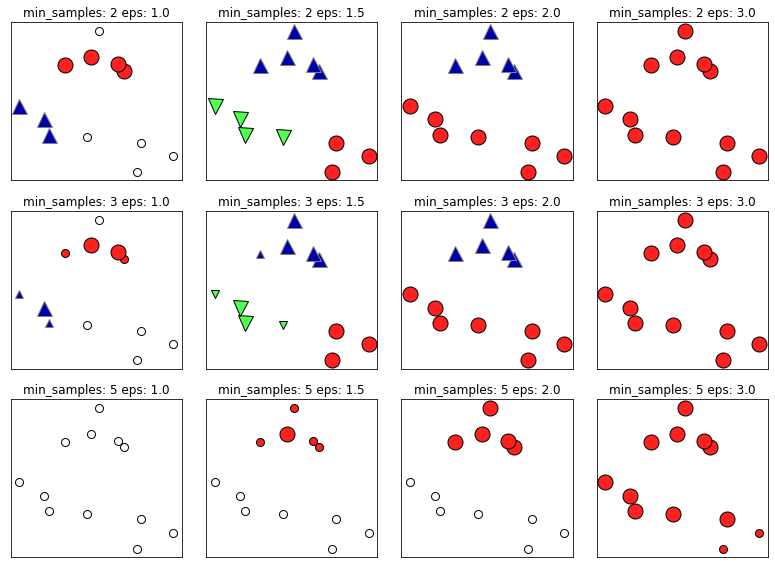

In [4]:
mglearn.plots.plot_dbscan()

# Increasing min_samples --> fewer points will be core points --> more points will be noise
# min_samples determines whether points in less dense regions will be labeled as noise or their own clusters

# Increasing eps --> more points will be included into cluster
# Very small eps - no points will be core samples, all points may be noise
# Very large eps - all points may form a single cluster
# eps implicitly controls how many clusters will be found

Defaults:  {'algorithm': 'auto', 'eps': 0.5, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 5, 'n_jobs': None, 'p': None}
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


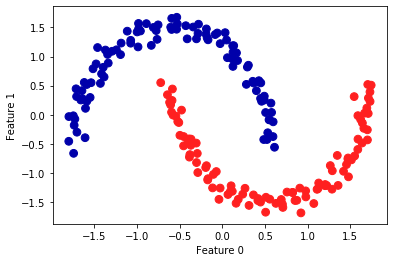

In [5]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) # transform all features to have similar ranges

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Defaults: ', dbscan.get_params())
print(dbscan.labels_)

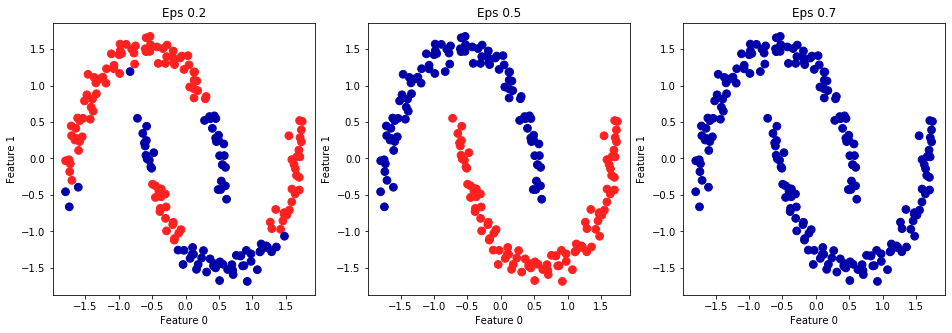

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
for eps, ax in zip([0.2, 0.5, 0.7], [ax1, ax2, ax3]):
    dbscan = DBSCAN(eps=eps)
    clusters = dbscan.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
    ax.set_title('Eps {}'.format(eps))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')